In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [86]:
df = pd.read_csv('/home/vyshnav/winequality-red.csv')

In [87]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
df.shape

(1599, 12)

In [89]:
x = df.drop('quality', axis=1)
y = pd.get_dummies(df['quality'])

In [90]:
x_norm=(x-x.mean())/x.std()

In [91]:
x_norm


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243


In [811]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=43)

In [812]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [813]:
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-5
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # to avoid division by zero error
    loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    return loss

In [858]:
def gradient_descent(X, y, learning_rate=0.05,epochs=1000):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]
    weights = np.zeros((n_features, n_classes))
    losses = []

    for i in range(epochs):
        z = np.dot(X, weights)
        y_pred = softmax(z)
        loss = cross_entropy_loss(y, y_pred)
        losses.append(loss)

        error = y_pred - y
        grad = np.dot(X.T, error) / n_samples
        weights -= learning_rate * grad
        
        if (i%(epochs/10)==0):
            print("Cost is:",loss)
            
    return weights,losses

In [859]:
y_train.shape

(1199, 6)

In [860]:
x_train.shape

(1199, 11)

In [861]:
x_train_with_bias = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
x_test_with_bias = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)
x_train_with_bias.shape

(1199, 12)

In [862]:
x_test_with_bias.shape

(400, 12)

In [863]:
weights,loss = gradient_descent(x_train_with_bias, y_train)

Cost is: 1.791759469228055
Cost is: 1.1480916547948548
Cost is: 1.0457987179405386
Cost is: 1.0093286501961314
Cost is: 0.9913836539929863
Cost is: 0.9807595201220254
Cost is: 0.973678888789665
Cost is: 0.9685632204453686
Cost is: 0.9646498148928487
Cost is: 0.961528996715928


In [864]:
weights


array([[-1.46131411, -0.74622296,  1.76520985,  1.8936752 , -0.10744177,
        -1.34390621],
       [ 0.05298102, -0.05576091, -0.2336558 , -0.01346321,  0.24405393,
         0.00584497],
       [ 0.43021112,  0.52870023,  0.14729014, -0.36113623, -0.55375432,
        -0.19131095],
       [ 0.0262248 , -0.03371498,  0.04509284, -0.22448196,  0.04565893,
         0.14122038],
       [ 0.0380198 ,  0.13466654, -0.15201779, -0.13290789,  0.11832125,
        -0.00608191],
       [ 0.10786777,  0.15762236,  0.09356843,  0.03532242, -0.28705323,
        -0.10732775],
       [-0.07307156, -0.20434209, -0.03152123,  0.16334749,  0.09018538,
         0.05540201],
       [-0.01562921, -0.00712572,  0.46312105, -0.08948321, -0.3358682 ,
        -0.01501472],
       [ 0.09698292, -0.0060424 ,  0.17005795,  0.14694798, -0.19263758,
        -0.21530888],
       [ 0.06338743,  0.12207966, -0.07060679, -0.01519527,  0.03265721,
        -0.13232224],
       [-0.13077145, -0.2292122 , -0.31206612,  0.

In [865]:
loss

[1.791759469228055,
 1.7747743021589635,
 1.7581669882763191,
 1.7419342349689937,
 1.7260724567239953,
 1.710577777723828,
 1.6954460367625594,
 1.68067279445172,
 1.6662533426434403,
 1.6521827159559188,
 1.6384557052469793,
 1.625066872846642,
 1.6120105693304267,
 1.5992809515924937,
 1.5868720019622293,
 1.5747775480997255,
 1.5629912834046198,
 1.551506787678514,
 1.5403175477929387,
 1.5294169781317026,
 1.5187984405973882,
 1.5084552639956763,
 1.498380762637013,
 1.4885682540218623,
 1.4790110755025085,
 1.469702599840311,
 1.4606362496018352,
 1.451805510359898,
 1.4432039426859733,
 1.4348251929383398,
 1.4266630028658052,
 1.4187112180597694,
 1.410963795297895,
 1.403414808830911,
 1.396058455670235,
 1.3888890599384056,
 1.3819010763469821,
 1.3750890928678157,
 1.3684478326636735,
 1.361972155343263,
 1.355657057604016,
 1.3494976733236446,
 1.3434892731587198,
 1.3376272637053763,
 1.331907186273938,
 1.3263247153257731,
 1.3208756566172042,
 1.3155559450918066,
 1.3103

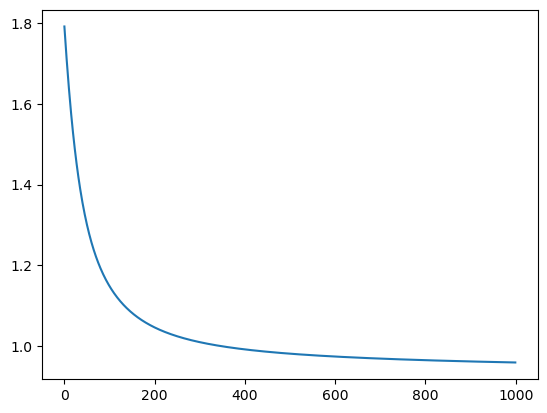

In [866]:
plt.plot(loss)

In [867]:
z_test = np.dot(x_test_with_bias, weights)
y_pred_test = softmax(z_test)
y_pred_test_argmax = np.argmax(y_pred_test, axis=1)

In [868]:
accuracy = np.mean(y_pred_test_argmax == np.argmax(y_test.values, axis=1))
print("Accuracy:", accuracy*100,"%")

Accuracy: 63.5 %
